In [1]:
# Code source: https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664

In [2]:
# 1. IMPORT LIBRARIES

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# 2. IMPORT THE DATASET

AAPL_stock_data = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
AAPL_stock_data.head()

# We evaluated different strategies to store data, but in this model we are saving the pulled data to a csv file to store it locally and quickly load it into the algortith

AAPL_df = pd.DataFrame(AAPL_stock_data)
AAPL_df.to_csv("AAPL_data.csv")

[*********************100%***********************]  1 of 1 completed


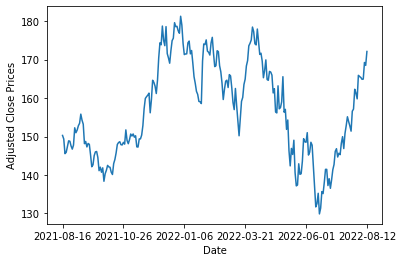

In [4]:
# 3. VISUALIZE THE DATA
# Plot a line chart of the adjusted close prices over time.

read_df = pd.read_csv("AAPL_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [5]:
# 4. DATA PRE-PROCESSING
# Clean the data so the algorithm can read it, we are going to remove missing or inconsistent values and change the index

# Step 4.1 : drop missing values

df = pd.read_csv("AAPL_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

# Step 4.2 : select x and y variables, we use 5 features
# x: values for the open, high, low, close and adj-close columns
# y: adj-close column

x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
print(x)
print(y)

[[148.53999329 151.19000244 146.47000122 151.11999512 150.27790833]
 [150.22999573 151.67999268 149.08999634 150.19000244 149.35310364]
 [149.80000305 150.72000122 146.1499939  146.36000061 145.54443359]
 ...
 [167.67999268 169.33999634 166.8999939  169.24000549 169.24000549]
 [170.05999756 170.99000549 168.19000244 168.49000549 168.49000549]
 [169.82000732 172.16999817 169.3999939  172.1000061  172.1000061 ]]
[150.27790833 149.35310364 145.54443359 145.8825531  147.36422729
 148.8757782  148.78627014 147.53329468 146.71784973 147.7719574
 152.26675415 150.98394775 151.66015625 152.79380798 153.44020081
 155.81689453 154.2456665  153.21147156 148.13989258 148.71665955
 147.29463196 148.19953918 147.96087646 145.24610901 142.14347839
 142.63075256 145.03729248 146.0118103  146.10131836 144.55995178
 141.11923218 142.03410339 140.71150208 141.85510254 138.3646698
 140.32368469 141.20874023 142.49153137 142.10369873 142.01422119
 140.72143555 140.12478638 142.95890808 144.03291321 145.733

In [6]:
# 4.3 DIVIDE DATA FOR TRAINING AND TESTING 
# Train: 70%
# Test: 30%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,  random_state=0)

In [7]:
# 5. STANDARIZE THE DATA
# This step is included to improve the training speed and add stability to the model 

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [8]:
#6. DEFINE THE MODEL 

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[173.75443567 174.22216541 178.68797269 174.19934753 163.23554477
 171.30606656 169.84217465 175.49329135 149.20428708 154.96164188
 174.71375555 147.02087231 165.81539795 142.50921201 174.1283092
 159.63577863 148.01915228 145.8313165  157.27685623 177.33621457
 177.71602258 147.83589029 155.82389227 160.7758877  148.54843293
 174.57347409 147.18384851 149.23749063 165.09678878 142.55175162
 142.70285757 162.99514624 162.22218549 147.67112524 137.36033359
 165.85160687 167.16971332 148.87079617 147.99320584 168.50198807
 174.89686591 152.01181738 169.4896517  131.26217221 172.09497342
 178.72969974 148.60337863 145.71561185 149.36476984 159.00144171
 161.05651935 174.57200232 165.47718909 164.30515662 150.08321157
 171.51121475 150.47669907 148.44013834 164.51539331 155.87275235
 140.84143314 164.50651166 147.45582013 144.76513699 156.37605142
 151.25530664 142.03141034 146.22445142 168.78497397 146.67915494
 160.99314972 159.64621375 166.6777894  154.58174948 132.67281271
 172.168056

In [9]:
# 7. DEFINITION OF PARAMETERS (HYPERPARAMETERS)
# This step is included to improve prediction of the model and to make the model more efficient

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator = model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 12, 'bootstrap': False}


In [10]:
# 8. PERFORMANCE EVALUATION
# We tested with Mean absolute error MEA, Mean squared error MSE
# Fit is evaluated with R^2

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.2601
Mean Squared Error: 0.177
Root Mean Squared Error: 0.4208
(R^2) Score: 0.9988
Train Score : 99.99% and Test Score : 99.88% using Random Tree Regressor.
Accuracy: 99.84 %.


In [23]:
# 9. PREDICTION 

predictions = pd.DataFrame({"Predictions": predict}, index= pd.date_range(start= df.index[1], periods=len(predict), freq="D"))
predictions.index.name = 'Date'
predictions.to_csv("Predicted_price_data.csv")

Buy price and date
            Predictions
Date                   
2021-08-25   149.204287
Sell price and date
            Predictions
Date                   
2021-08-19   178.687973


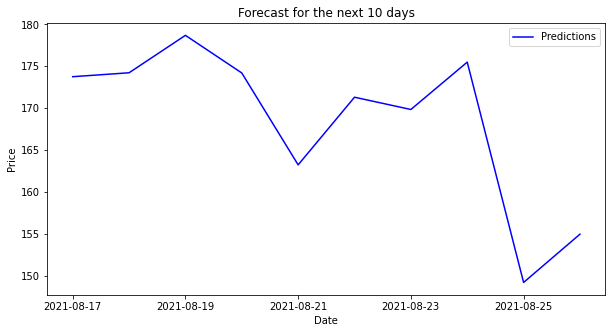

In [12]:
# FUTURE - TEN DAYS PREDICTION

tendays_df = pd.DataFrame(predictions[:10])
tendays_df.to_csv("ten_days_prediction.csv")

tendays_df_pred = pd.read_csv("ten_days_prediction.csv")
tendays_df_pred.set_index("Date", inplace=True)
buy_price = min(tendays_df_pred["Predictions"])
sell_price = max(tendays_df_pred["Predictions"])
tendays_buy = tendays_df_pred.loc[tendays_df_pred["Predictions"] == buy_price]
tendays_sell = tendays_df_pred.loc[tendays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(tendays_buy)
print("Sell price and date")
print(tendays_sell)

tendays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 10 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Date                   
2021-08-30   142.509212
Sell price and date
            Predictions
Date                   
2021-08-19   178.687973


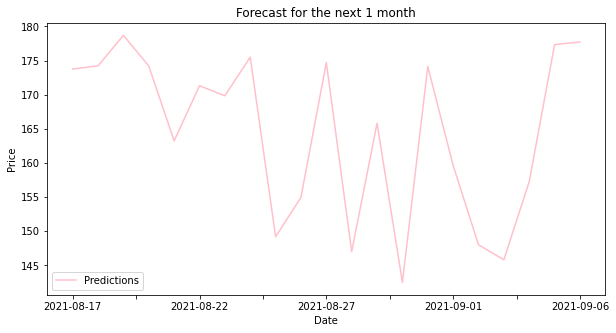

In [13]:
# FUTURE - ONE MONTH PREDICTION

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one_month_prediction.csv")

onemonth_df_pred = pd.read_csv("one_month_prediction.csv")
onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="pink")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



In [14]:
import time
start_time = time.time()

model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

time.sleep(2.5)
print("--- %s seconds to train ---" % (time.time() - start_time))

start_time = time.time()

predictions = pd.DataFrame({"Predictions": predict}, index= pd.date_range(start= df.index[1], periods=len(predict), freq="D"))

time.sleep(2.5)
print("--- %s seconds to predict ---" % (time.time() - start_time))

--- 2.9889028072357178 seconds to train ---
--- 2.504958152770996 seconds to predict ---
